In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Open data
df1 = pd.read_csv('/Users/jkt-ltp-038/Downloads/agriaku_20230804_qcm_dataset-master/dataset/QCM3.csv',sep=';')
df2 = pd.read_csv('/Users/jkt-ltp-038/Downloads/agriaku_20230804_qcm_dataset-master/dataset/QCM6.csv',sep=';')
df3 = pd.read_csv('/Users/jkt-ltp-038/Downloads/agriaku_20230804_qcm_dataset-master/dataset/QCM7.csv',sep=';')
df4 = pd.read_csv('/Users/jkt-ltp-038/Downloads/agriaku_20230804_qcm_dataset-master/dataset/QCM10.csv',sep=';')
df5 = pd.read_csv('/Users/jkt-ltp-038/Downloads/agriaku_20230804_qcm_dataset-master/dataset/QCM12.csv',sep=';')

In [3]:
data=pd.concat([df1,df2,df3,df4,df5])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 24
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0.799_0.201_MIP  125 non-null    float64
 1   0.799_0.201_NP   125 non-null    float64
 2   0.700_0.300_MIP  125 non-null    float64
 3   0.700_0.300_NP   125 non-null    float64
 4   0.600_0.400_MIP  125 non-null    float64
 5   0.600_0.400_NP   125 non-null    float64
 6   0.501_0.499_MIP  125 non-null    float64
 7   0.501_0.499_NP   125 non-null    float64
 8   0.400_0.600_MIP  125 non-null    float64
 9   0.400_0.600_NP   125 non-null    float64
 10  1-Octanol        125 non-null    int64  
 11  1-Propanol       125 non-null    int64  
 12  2-Butanol        125 non-null    int64  
 13  2-propanol       125 non-null    int64  
 14  1-isobutanol     125 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 15.6 KB


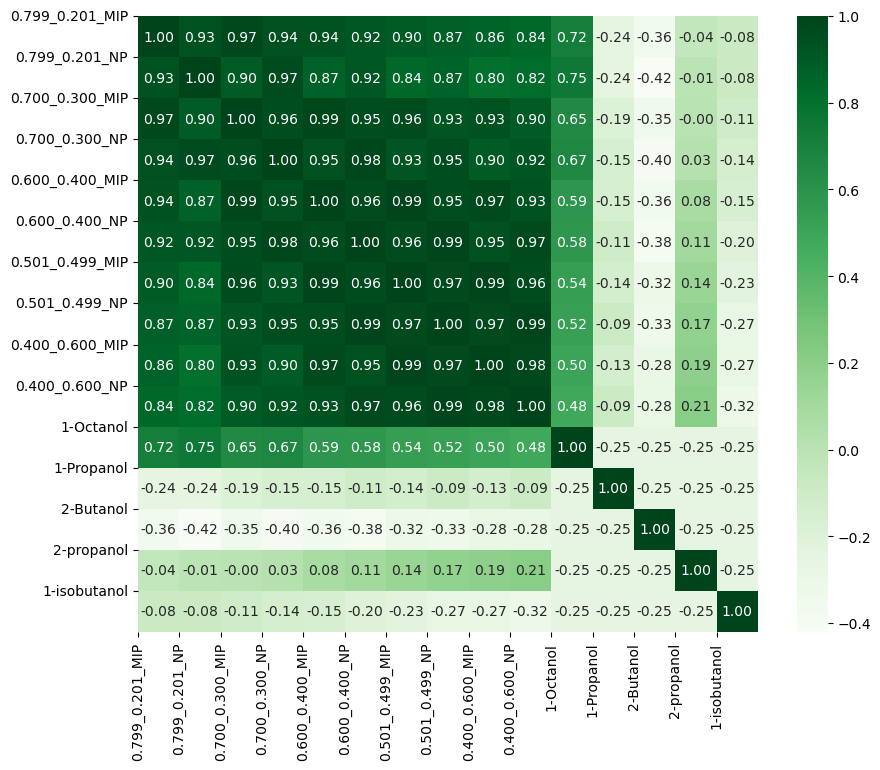

In [5]:
#Plot heatmap
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='Greens', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [6]:
data.loc[data["1-Octanol"] == 1, 'alcohol'] = '1-Octanol'
data.loc[data["1-Propanol"] == 1, 'alcohol'] = '1-Propanol'
data.loc[data["2-Butanol"] == 1, 'alcohol'] = '2-Butanol'
data.loc[data["2-propanol"] == 1, 'alcohol'] = '2-propanol'
data.loc[data["1-isobutanol"] == 1, 'alcohol'] = '1-isobutanol'

In [7]:
data.drop('alcohol', axis = 1, inplace = True)

In [8]:
X = data.iloc[:, 0:10].values
y = data.iloc[:, [10,11,12,13,14]].values

# ML Random Forest Classifier

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/normalize the features if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision (replace 'your_labels' with actual class labels)
precision = precision_score(y_test, y_pred,average='weighted')

# Calculate recall (replace 'your_labels' with actual class labels)
recall = recall_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


# ANN

In [10]:
from keras.models import Sequential
from keras.layers import Dense

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 3000, epochs = 8000, verbose = 1)

Epoch 1/8000
1/1 [==============================] - 0s 199ms/step - loss: 1.6094 - accuracy: 0.0800 - val_loss: 1.6096 - val_accuracy: 0.1200
Epoch 2/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.6093 - accuracy: 0.2200 - val_loss: 1.6099 - val_accuracy: 0.1200
Epoch 3/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.6092 - accuracy: 0.2200 - val_loss: 1.6101 - val_accuracy: 0.1200
Epoch 4/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.6091 - accuracy: 0.2200 - val_loss: 1.6103 - val_accuracy: 0.1200
Epoch 5/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.6090 - accuracy: 0.2200 - val_loss: 1.6105 - val_accuracy: 0.1200
Epoch 6/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.6088 - accuracy: 0.2200 - val_loss: 1.6107 - val_accuracy: 0.1200
Epoch 7/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.6087 - accuracy: 0.2200 - val_loss: 1.6109 - val_accuracy: 0.1200
Epoch 8/8000

Epoch 59/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.5682 - accuracy: 0.3800 - val_loss: 1.6062 - val_accuracy: 0.2400
Epoch 60/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.5662 - accuracy: 0.3800 - val_loss: 1.6056 - val_accuracy: 0.2400
Epoch 61/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.5640 - accuracy: 0.3900 - val_loss: 1.6049 - val_accuracy: 0.2400
Epoch 62/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.5618 - accuracy: 0.3900 - val_loss: 1.6042 - val_accuracy: 0.2400
Epoch 63/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.5595 - accuracy: 0.3900 - val_loss: 1.6034 - val_accuracy: 0.2400
Epoch 64/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.5571 - accuracy: 0.3900 - val_loss: 1.6026 - val_accuracy: 0.2400
Epoch 65/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.5546 - accuracy: 0.3900 - val_loss: 1.6018 - val_accuracy: 0.2400
Epoch 

1/1 [==============================] - 0s 11ms/step - loss: 1.4084 - accuracy: 0.3900 - val_loss: 1.5675 - val_accuracy: 0.2400
Epoch 117/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.4067 - accuracy: 0.3900 - val_loss: 1.5667 - val_accuracy: 0.2400
Epoch 118/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.4049 - accuracy: 0.3900 - val_loss: 1.5659 - val_accuracy: 0.2400
Epoch 119/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.4032 - accuracy: 0.3900 - val_loss: 1.5650 - val_accuracy: 0.2400
Epoch 120/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.4015 - accuracy: 0.3900 - val_loss: 1.5640 - val_accuracy: 0.2400
Epoch 121/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.3997 - accuracy: 0.3900 - val_loss: 1.5629 - val_accuracy: 0.2400
Epoch 122/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.3980 - accuracy: 0.3900 - val_loss: 1.5617 - val_accuracy: 0.2400
Epoch 123/8000

1/1 [==============================] - 0s 10ms/step - loss: 1.2991 - accuracy: 0.4200 - val_loss: 1.4745 - val_accuracy: 0.2800
Epoch 174/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.2968 - accuracy: 0.4200 - val_loss: 1.4725 - val_accuracy: 0.2800
Epoch 175/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.2945 - accuracy: 0.4200 - val_loss: 1.4704 - val_accuracy: 0.2800
Epoch 176/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.2921 - accuracy: 0.4200 - val_loss: 1.4683 - val_accuracy: 0.2800
Epoch 177/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.2897 - accuracy: 0.4200 - val_loss: 1.4661 - val_accuracy: 0.2800
Epoch 178/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.2873 - accuracy: 0.4200 - val_loss: 1.4640 - val_accuracy: 0.2800
Epoch 179/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.2849 - accuracy: 0.4200 - val_loss: 1.4618 - val_accuracy: 0.2800
Epoch 180/8000

1/1 [==============================] - 0s 11ms/step - loss: 1.1476 - accuracy: 0.5200 - val_loss: 1.3576 - val_accuracy: 0.4800
Epoch 231/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.1451 - accuracy: 0.5100 - val_loss: 1.3559 - val_accuracy: 0.4800
Epoch 232/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.1426 - accuracy: 0.5200 - val_loss: 1.3543 - val_accuracy: 0.4400
Epoch 233/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.1402 - accuracy: 0.5300 - val_loss: 1.3527 - val_accuracy: 0.4400
Epoch 234/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.1377 - accuracy: 0.5300 - val_loss: 1.3511 - val_accuracy: 0.4400
Epoch 235/8000
1/1 [==============================] - 0s 10ms/step - loss: 1.1353 - accuracy: 0.5200 - val_loss: 1.3495 - val_accuracy: 0.4400
Epoch 236/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.1328 - accuracy: 0.5200 - val_loss: 1.3478 - val_accuracy: 0.4400
Epoch 237/8000

1/1 [==============================] - 0s 11ms/step - loss: 1.0202 - accuracy: 0.5600 - val_loss: 1.2650 - val_accuracy: 0.3200
Epoch 288/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.0184 - accuracy: 0.5700 - val_loss: 1.2634 - val_accuracy: 0.3200
Epoch 289/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.0165 - accuracy: 0.5800 - val_loss: 1.2619 - val_accuracy: 0.3200
Epoch 290/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.0147 - accuracy: 0.5900 - val_loss: 1.2605 - val_accuracy: 0.3200
Epoch 291/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.0129 - accuracy: 0.5900 - val_loss: 1.2591 - val_accuracy: 0.3200
Epoch 292/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.0110 - accuracy: 0.5900 - val_loss: 1.2577 - val_accuracy: 0.3200
Epoch 293/8000
1/1 [==============================] - 0s 11ms/step - loss: 1.0092 - accuracy: 0.5900 - val_loss: 1.2563 - val_accuracy: 0.3200
Epoch 294/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.9287 - accuracy: 0.6000 - val_loss: 1.1886 - val_accuracy: 0.3600
Epoch 345/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.9273 - accuracy: 0.6000 - val_loss: 1.1872 - val_accuracy: 0.3600
Epoch 346/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.9259 - accuracy: 0.6000 - val_loss: 1.1859 - val_accuracy: 0.3600
Epoch 347/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.9246 - accuracy: 0.6000 - val_loss: 1.1846 - val_accuracy: 0.3600
Epoch 348/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.9232 - accuracy: 0.6000 - val_loss: 1.1832 - val_accuracy: 0.3600
Epoch 349/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.9218 - accuracy: 0.6000 - val_loss: 1.1819 - val_accuracy: 0.3600
Epoch 350/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.9204 - accuracy: 0.6000 - val_loss: 1.1806 - val_accuracy: 0.3600
Epoch 351/8000

1/1 [==============================] - 0s 11ms/step - loss: 0.8573 - accuracy: 0.6100 - val_loss: 1.1103 - val_accuracy: 0.5600
Epoch 402/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.8562 - accuracy: 0.6100 - val_loss: 1.1088 - val_accuracy: 0.5600
Epoch 403/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.8551 - accuracy: 0.6100 - val_loss: 1.1074 - val_accuracy: 0.5600
Epoch 404/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.8539 - accuracy: 0.6000 - val_loss: 1.1059 - val_accuracy: 0.5600
Epoch 405/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.8528 - accuracy: 0.6000 - val_loss: 1.1045 - val_accuracy: 0.5600
Epoch 406/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.8517 - accuracy: 0.6000 - val_loss: 1.1030 - val_accuracy: 0.5600
Epoch 407/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.8506 - accuracy: 0.6000 - val_loss: 1.1016 - val_accuracy: 0.5600
Epoch 408/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.7963 - accuracy: 0.6500 - val_loss: 1.0273 - val_accuracy: 0.6000
Epoch 459/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.7953 - accuracy: 0.6500 - val_loss: 1.0261 - val_accuracy: 0.6000
Epoch 460/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.7943 - accuracy: 0.6500 - val_loss: 1.0249 - val_accuracy: 0.6000
Epoch 461/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.7933 - accuracy: 0.6500 - val_loss: 1.0238 - val_accuracy: 0.6000
Epoch 462/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.7923 - accuracy: 0.6500 - val_loss: 1.0228 - val_accuracy: 0.6000
Epoch 463/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.7914 - accuracy: 0.6500 - val_loss: 1.0218 - val_accuracy: 0.6000
Epoch 464/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.7904 - accuracy: 0.6500 - val_loss: 1.0208 - val_accuracy: 0.6000
Epoch 465/8000

1/1 [==============================] - 0s 11ms/step - loss: 0.7436 - accuracy: 0.6600 - val_loss: 0.9685 - val_accuracy: 0.6400
Epoch 516/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.7427 - accuracy: 0.6600 - val_loss: 0.9674 - val_accuracy: 0.6400
Epoch 517/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.7419 - accuracy: 0.6600 - val_loss: 0.9663 - val_accuracy: 0.6400
Epoch 518/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.7410 - accuracy: 0.6600 - val_loss: 0.9653 - val_accuracy: 0.6400
Epoch 519/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.7402 - accuracy: 0.6600 - val_loss: 0.9642 - val_accuracy: 0.6400
Epoch 520/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.7393 - accuracy: 0.6600 - val_loss: 0.9631 - val_accuracy: 0.6400
Epoch 521/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.7385 - accuracy: 0.6600 - val_loss: 0.9620 - val_accuracy: 0.6400
Epoch 522/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.6984 - accuracy: 0.6800 - val_loss: 0.9118 - val_accuracy: 0.6800
Epoch 573/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6977 - accuracy: 0.6800 - val_loss: 0.9109 - val_accuracy: 0.6800
Epoch 574/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6970 - accuracy: 0.6800 - val_loss: 0.9100 - val_accuracy: 0.6800
Epoch 575/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.6963 - accuracy: 0.6800 - val_loss: 0.9090 - val_accuracy: 0.6800
Epoch 576/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6956 - accuracy: 0.6800 - val_loss: 0.9080 - val_accuracy: 0.6800
Epoch 577/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6949 - accuracy: 0.6800 - val_loss: 0.9071 - val_accuracy: 0.6800
Epoch 578/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6942 - accuracy: 0.6800 - val_loss: 0.9062 - val_accuracy: 0.6800
Epoch 579/8000

1/1 [==============================] - 0s 11ms/step - loss: 0.6599 - accuracy: 0.7100 - val_loss: 0.8575 - val_accuracy: 0.6400
Epoch 630/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.6592 - accuracy: 0.7100 - val_loss: 0.8567 - val_accuracy: 0.6400
Epoch 631/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.6586 - accuracy: 0.7100 - val_loss: 0.8558 - val_accuracy: 0.6400
Epoch 632/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.6580 - accuracy: 0.7200 - val_loss: 0.8550 - val_accuracy: 0.6400
Epoch 633/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.7200 - val_loss: 0.8544 - val_accuracy: 0.6400
Epoch 634/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6567 - accuracy: 0.7200 - val_loss: 0.8536 - val_accuracy: 0.6400
Epoch 635/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.6561 - accuracy: 0.7200 - val_loss: 0.8529 - val_accuracy: 0.6400
Epoch 636/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.6249 - accuracy: 0.7200 - val_loss: 0.8107 - val_accuracy: 0.6400
Epoch 687/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6243 - accuracy: 0.7200 - val_loss: 0.8098 - val_accuracy: 0.6400
Epoch 688/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6237 - accuracy: 0.7200 - val_loss: 0.8090 - val_accuracy: 0.6400
Epoch 689/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6231 - accuracy: 0.7200 - val_loss: 0.8082 - val_accuracy: 0.6400
Epoch 690/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.6225 - accuracy: 0.7200 - val_loss: 0.8074 - val_accuracy: 0.6400
Epoch 691/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.6219 - accuracy: 0.7200 - val_loss: 0.8065 - val_accuracy: 0.6400
Epoch 692/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.6214 - accuracy: 0.7200 - val_loss: 0.8057 - val_accuracy: 0.6400
Epoch 693/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.5924 - accuracy: 0.7400 - val_loss: 0.7625 - val_accuracy: 0.6800
Epoch 744/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5919 - accuracy: 0.7400 - val_loss: 0.7617 - val_accuracy: 0.6800
Epoch 745/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5913 - accuracy: 0.7400 - val_loss: 0.7609 - val_accuracy: 0.6800
Epoch 746/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5908 - accuracy: 0.7400 - val_loss: 0.7601 - val_accuracy: 0.6800
Epoch 747/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5902 - accuracy: 0.7400 - val_loss: 0.7594 - val_accuracy: 0.6800
Epoch 748/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5896 - accuracy: 0.7400 - val_loss: 0.7586 - val_accuracy: 0.6800
Epoch 749/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5891 - accuracy: 0.7400 - val_loss: 0.7578 - val_accuracy: 0.6800
Epoch 750/8000

1/1 [==============================] - 0s 11ms/step - loss: 0.5617 - accuracy: 0.7600 - val_loss: 0.7171 - val_accuracy: 0.6800
Epoch 801/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5612 - accuracy: 0.7600 - val_loss: 0.7163 - val_accuracy: 0.6800
Epoch 802/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5607 - accuracy: 0.7600 - val_loss: 0.7155 - val_accuracy: 0.6800
Epoch 803/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5602 - accuracy: 0.7600 - val_loss: 0.7147 - val_accuracy: 0.6800
Epoch 804/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.5597 - accuracy: 0.7600 - val_loss: 0.7138 - val_accuracy: 0.6800
Epoch 805/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5591 - accuracy: 0.7600 - val_loss: 0.7131 - val_accuracy: 0.6800
Epoch 806/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5586 - accuracy: 0.7600 - val_loss: 0.7123 - val_accuracy: 0.6800
Epoch 807/8000

1/1 [==============================] - 0s 11ms/step - loss: 0.5326 - accuracy: 0.7800 - val_loss: 0.6706 - val_accuracy: 0.7200
Epoch 858/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5321 - accuracy: 0.7800 - val_loss: 0.6696 - val_accuracy: 0.7200
Epoch 859/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5316 - accuracy: 0.7800 - val_loss: 0.6687 - val_accuracy: 0.7200
Epoch 860/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.5311 - accuracy: 0.7800 - val_loss: 0.6679 - val_accuracy: 0.7200
Epoch 861/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5306 - accuracy: 0.7800 - val_loss: 0.6671 - val_accuracy: 0.7200
Epoch 862/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5301 - accuracy: 0.7800 - val_loss: 0.6663 - val_accuracy: 0.7200
Epoch 863/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5296 - accuracy: 0.7800 - val_loss: 0.6655 - val_accuracy: 0.7200
Epoch 864/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.5060 - accuracy: 0.8100 - val_loss: 0.6286 - val_accuracy: 0.7200
Epoch 915/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.5055 - accuracy: 0.8100 - val_loss: 0.6279 - val_accuracy: 0.7200
Epoch 916/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.5051 - accuracy: 0.8100 - val_loss: 0.6273 - val_accuracy: 0.7200
Epoch 917/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5046 - accuracy: 0.8100 - val_loss: 0.6266 - val_accuracy: 0.7200
Epoch 918/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.5042 - accuracy: 0.8100 - val_loss: 0.6259 - val_accuracy: 0.7200
Epoch 919/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.5038 - accuracy: 0.8100 - val_loss: 0.6252 - val_accuracy: 0.7200
Epoch 920/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.5033 - accuracy: 0.8100 - val_loss: 0.6246 - val_accuracy: 0.7200
Epoch 921/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.4819 - accuracy: 0.8100 - val_loss: 0.5908 - val_accuracy: 0.7600
Epoch 972/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4815 - accuracy: 0.8100 - val_loss: 0.5901 - val_accuracy: 0.7600
Epoch 973/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.4811 - accuracy: 0.8100 - val_loss: 0.5895 - val_accuracy: 0.7600
Epoch 974/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4807 - accuracy: 0.8100 - val_loss: 0.5888 - val_accuracy: 0.7600
Epoch 975/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.4803 - accuracy: 0.8100 - val_loss: 0.5881 - val_accuracy: 0.7600
Epoch 976/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.4799 - accuracy: 0.8100 - val_loss: 0.5874 - val_accuracy: 0.7600
Epoch 977/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.4795 - accuracy: 0.8100 - val_loss: 0.5867 - val_accuracy: 0.7600
Epoch 978/8000

1/1 [==============================] - 0s 10ms/step - loss: 0.4599 - accuracy: 0.8100 - val_loss: 0.5558 - val_accuracy: 0.8000
Epoch 1029/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4596 - accuracy: 0.8100 - val_loss: 0.5551 - val_accuracy: 0.8000
Epoch 1030/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4592 - accuracy: 0.8100 - val_loss: 0.5544 - val_accuracy: 0.8000
Epoch 1031/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4588 - accuracy: 0.8100 - val_loss: 0.5537 - val_accuracy: 0.8000
Epoch 1032/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4584 - accuracy: 0.8100 - val_loss: 0.5529 - val_accuracy: 0.8000
Epoch 1033/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4581 - accuracy: 0.8100 - val_loss: 0.5522 - val_accuracy: 0.8000
Epoch 1034/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.4577 - accuracy: 0.8100 - val_loss: 0.5516 - val_accuracy: 0.8000
Epoch 10

1/1 [==============================] - 0s 11ms/step - loss: 0.4389 - accuracy: 0.8300 - val_loss: 0.5203 - val_accuracy: 0.8000
Epoch 1086/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.4385 - accuracy: 0.8300 - val_loss: 0.5197 - val_accuracy: 0.8000
Epoch 1087/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.4382 - accuracy: 0.8300 - val_loss: 0.5191 - val_accuracy: 0.8000
Epoch 1088/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.4378 - accuracy: 0.8300 - val_loss: 0.5186 - val_accuracy: 0.8000
Epoch 1089/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.4374 - accuracy: 0.8300 - val_loss: 0.5182 - val_accuracy: 0.8000
Epoch 1090/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4371 - accuracy: 0.8300 - val_loss: 0.5177 - val_accuracy: 0.8000
Epoch 1091/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4367 - accuracy: 0.8300 - val_loss: 0.5171 - val_accuracy: 0.8000
Epoch 10

1/1 [==============================] - 0s 11ms/step - loss: 0.4182 - accuracy: 0.8500 - val_loss: 0.4896 - val_accuracy: 0.8400
Epoch 1143/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4179 - accuracy: 0.8500 - val_loss: 0.4894 - val_accuracy: 0.8400
Epoch 1144/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4175 - accuracy: 0.8500 - val_loss: 0.4892 - val_accuracy: 0.8400
Epoch 1145/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4171 - accuracy: 0.8500 - val_loss: 0.4888 - val_accuracy: 0.8400
Epoch 1146/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4168 - accuracy: 0.8500 - val_loss: 0.4884 - val_accuracy: 0.8400
Epoch 1147/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4164 - accuracy: 0.8500 - val_loss: 0.4879 - val_accuracy: 0.8400
Epoch 1148/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.4160 - accuracy: 0.8500 - val_loss: 0.4874 - val_accuracy: 0.8400
Epoch 11

1/1 [==============================] - 0s 10ms/step - loss: 0.3832 - accuracy: 0.8500 - val_loss: 0.4405 - val_accuracy: 0.8400
Epoch 1200/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3823 - accuracy: 0.8500 - val_loss: 0.4393 - val_accuracy: 0.8400
Epoch 1201/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.3815 - accuracy: 0.8500 - val_loss: 0.4379 - val_accuracy: 0.8400
Epoch 1202/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3807 - accuracy: 0.8500 - val_loss: 0.4363 - val_accuracy: 0.8400
Epoch 1203/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.3799 - accuracy: 0.8500 - val_loss: 0.4348 - val_accuracy: 0.8400
Epoch 1204/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3791 - accuracy: 0.8600 - val_loss: 0.4334 - val_accuracy: 0.8400
Epoch 1205/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.3783 - accuracy: 0.8600 - val_loss: 0.4321 - val_accuracy: 0.8400
Epoch 12

1/1 [==============================] - 0s 10ms/step - loss: 0.3433 - accuracy: 0.8600 - val_loss: 0.3741 - val_accuracy: 0.8400
Epoch 1257/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3423 - accuracy: 0.8600 - val_loss: 0.3726 - val_accuracy: 0.8400
Epoch 1258/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3413 - accuracy: 0.8600 - val_loss: 0.3711 - val_accuracy: 0.8400
Epoch 1259/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3402 - accuracy: 0.8700 - val_loss: 0.3695 - val_accuracy: 0.8400
Epoch 1260/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.3392 - accuracy: 0.8700 - val_loss: 0.3679 - val_accuracy: 0.8400
Epoch 1261/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3382 - accuracy: 0.8700 - val_loss: 0.3663 - val_accuracy: 0.8400
Epoch 1262/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.3372 - accuracy: 0.8700 - val_loss: 0.3648 - val_accuracy: 0.8400
Epoch 12

1/1 [==============================] - 0s 11ms/step - loss: 0.2979 - accuracy: 0.8600 - val_loss: 0.3347 - val_accuracy: 0.8800
Epoch 1314/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2973 - accuracy: 0.8600 - val_loss: 0.3342 - val_accuracy: 0.8800
Epoch 1315/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2968 - accuracy: 0.8600 - val_loss: 0.3337 - val_accuracy: 0.8800
Epoch 1316/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2962 - accuracy: 0.8600 - val_loss: 0.3332 - val_accuracy: 0.8800
Epoch 1317/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2957 - accuracy: 0.8700 - val_loss: 0.3328 - val_accuracy: 0.8800
Epoch 1318/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.2952 - accuracy: 0.8700 - val_loss: 0.3324 - val_accuracy: 0.8800
Epoch 1319/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2946 - accuracy: 0.8700 - val_loss: 0.3319 - val_accuracy: 0.8800
Epoch 13

1/1 [==============================] - 0s 11ms/step - loss: 0.2705 - accuracy: 0.8900 - val_loss: 0.3059 - val_accuracy: 0.8800
Epoch 1371/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2701 - accuracy: 0.8900 - val_loss: 0.3056 - val_accuracy: 0.8800
Epoch 1372/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2697 - accuracy: 0.8900 - val_loss: 0.3055 - val_accuracy: 0.8800
Epoch 1373/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2693 - accuracy: 0.8900 - val_loss: 0.3050 - val_accuracy: 0.8800
Epoch 1374/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2689 - accuracy: 0.8900 - val_loss: 0.3043 - val_accuracy: 0.8800
Epoch 1375/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2685 - accuracy: 0.8900 - val_loss: 0.3033 - val_accuracy: 0.8800
Epoch 1376/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2681 - accuracy: 0.8900 - val_loss: 0.3025 - val_accuracy: 0.8800
Epoch 13

1/1 [==============================] - 0s 11ms/step - loss: 0.2502 - accuracy: 0.9000 - val_loss: 0.2809 - val_accuracy: 0.9200
Epoch 1428/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2499 - accuracy: 0.9000 - val_loss: 0.2804 - val_accuracy: 0.9200
Epoch 1429/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2495 - accuracy: 0.9000 - val_loss: 0.2797 - val_accuracy: 0.9200
Epoch 1430/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2492 - accuracy: 0.9000 - val_loss: 0.2788 - val_accuracy: 0.9200
Epoch 1431/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2489 - accuracy: 0.9000 - val_loss: 0.2782 - val_accuracy: 0.9200
Epoch 1432/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2486 - accuracy: 0.9000 - val_loss: 0.2778 - val_accuracy: 0.9200
Epoch 1433/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2483 - accuracy: 0.9000 - val_loss: 0.2775 - val_accuracy: 0.9200
Epoch 14

1/1 [==============================] - 0s 10ms/step - loss: 0.2343 - accuracy: 0.9000 - val_loss: 0.2613 - val_accuracy: 0.9200
Epoch 1485/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2340 - accuracy: 0.9000 - val_loss: 0.2610 - val_accuracy: 0.9200
Epoch 1486/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2338 - accuracy: 0.9000 - val_loss: 0.2606 - val_accuracy: 0.9200
Epoch 1487/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2335 - accuracy: 0.9000 - val_loss: 0.2596 - val_accuracy: 0.9200
Epoch 1488/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2333 - accuracy: 0.9000 - val_loss: 0.2589 - val_accuracy: 0.9200
Epoch 1489/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2331 - accuracy: 0.9000 - val_loss: 0.2584 - val_accuracy: 0.9200
Epoch 1490/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2329 - accuracy: 0.9000 - val_loss: 0.2583 - val_accuracy: 0.9200
Epoch 14

1/1 [==============================] - 0s 10ms/step - loss: 0.2213 - accuracy: 0.9100 - val_loss: 0.2424 - val_accuracy: 0.8800
Epoch 1542/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2211 - accuracy: 0.9100 - val_loss: 0.2425 - val_accuracy: 0.8800
Epoch 1543/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2208 - accuracy: 0.9100 - val_loss: 0.2431 - val_accuracy: 0.8800
Epoch 1544/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2206 - accuracy: 0.9100 - val_loss: 0.2438 - val_accuracy: 0.8800
Epoch 1545/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2205 - accuracy: 0.9100 - val_loss: 0.2437 - val_accuracy: 0.8800
Epoch 1546/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2203 - accuracy: 0.9100 - val_loss: 0.2429 - val_accuracy: 0.8800
Epoch 1547/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2200 - accuracy: 0.9100 - val_loss: 0.2421 - val_accuracy: 0.8800
Epoch 15

1/1 [==============================] - 0s 10ms/step - loss: 0.2103 - accuracy: 0.9000 - val_loss: 0.2299 - val_accuracy: 0.8800
Epoch 1599/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.2102 - accuracy: 0.9000 - val_loss: 0.2297 - val_accuracy: 0.8800
Epoch 1600/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2100 - accuracy: 0.9000 - val_loss: 0.2298 - val_accuracy: 0.8800
Epoch 1601/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2098 - accuracy: 0.9000 - val_loss: 0.2301 - val_accuracy: 0.8800
Epoch 1602/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2096 - accuracy: 0.9000 - val_loss: 0.2307 - val_accuracy: 0.8800
Epoch 1603/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2095 - accuracy: 0.9000 - val_loss: 0.2306 - val_accuracy: 0.8800
Epoch 1604/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2094 - accuracy: 0.9000 - val_loss: 0.2299 - val_accuracy: 0.8800
Epoch 16

1/1 [==============================] - 0s 10ms/step - loss: 0.2011 - accuracy: 0.9000 - val_loss: 0.2196 - val_accuracy: 0.8800
Epoch 1656/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2010 - accuracy: 0.9000 - val_loss: 0.2191 - val_accuracy: 0.8800
Epoch 1657/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2008 - accuracy: 0.9000 - val_loss: 0.2189 - val_accuracy: 0.8800
Epoch 1658/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2006 - accuracy: 0.9000 - val_loss: 0.2190 - val_accuracy: 0.8800
Epoch 1659/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2005 - accuracy: 0.9000 - val_loss: 0.2186 - val_accuracy: 0.8800
Epoch 1660/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2003 - accuracy: 0.9000 - val_loss: 0.2188 - val_accuracy: 0.8800
Epoch 1661/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.2002 - accuracy: 0.9000 - val_loss: 0.2184 - val_accuracy: 0.8800
Epoch 16

1/1 [==============================] - 0s 10ms/step - loss: 0.1932 - accuracy: 0.9000 - val_loss: 0.2099 - val_accuracy: 0.8800
Epoch 1713/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1931 - accuracy: 0.9000 - val_loss: 0.2099 - val_accuracy: 0.8800
Epoch 1714/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1929 - accuracy: 0.9000 - val_loss: 0.2104 - val_accuracy: 0.8800
Epoch 1715/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1928 - accuracy: 0.9000 - val_loss: 0.2111 - val_accuracy: 0.8800
Epoch 1716/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1927 - accuracy: 0.9000 - val_loss: 0.2113 - val_accuracy: 0.8800
Epoch 1717/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1926 - accuracy: 0.9000 - val_loss: 0.2110 - val_accuracy: 0.8800
Epoch 1718/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1924 - accuracy: 0.9000 - val_loss: 0.2102 - val_accuracy: 0.8800
Epoch 17

1/1 [==============================] - 0s 10ms/step - loss: 0.1862 - accuracy: 0.9000 - val_loss: 0.2034 - val_accuracy: 0.8800
Epoch 1770/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1861 - accuracy: 0.9000 - val_loss: 0.2033 - val_accuracy: 0.8800
Epoch 1771/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1860 - accuracy: 0.9000 - val_loss: 0.2028 - val_accuracy: 0.8800
Epoch 1772/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1858 - accuracy: 0.9000 - val_loss: 0.2028 - val_accuracy: 0.8800
Epoch 1773/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1857 - accuracy: 0.9000 - val_loss: 0.2032 - val_accuracy: 0.8800
Epoch 1774/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1856 - accuracy: 0.9000 - val_loss: 0.2031 - val_accuracy: 0.8800
Epoch 1775/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1855 - accuracy: 0.9000 - val_loss: 0.2027 - val_accuracy: 0.8800
Epoch 17

1/1 [==============================] - 0s 10ms/step - loss: 0.1799 - accuracy: 0.9000 - val_loss: 0.1958 - val_accuracy: 0.8800
Epoch 1827/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1799 - accuracy: 0.9000 - val_loss: 0.1957 - val_accuracy: 0.8800
Epoch 1828/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1797 - accuracy: 0.9000 - val_loss: 0.1957 - val_accuracy: 0.8800
Epoch 1829/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1796 - accuracy: 0.9000 - val_loss: 0.1956 - val_accuracy: 0.8800
Epoch 1830/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1796 - accuracy: 0.9000 - val_loss: 0.1954 - val_accuracy: 0.8800
Epoch 1831/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1794 - accuracy: 0.9000 - val_loss: 0.1950 - val_accuracy: 0.8800
Epoch 1832/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1794 - accuracy: 0.9000 - val_loss: 0.1949 - val_accuracy: 0.8800
Epoch 18

1/1 [==============================] - 0s 11ms/step - loss: 0.1743 - accuracy: 0.9000 - val_loss: 0.1890 - val_accuracy: 0.8800
Epoch 1884/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1742 - accuracy: 0.9000 - val_loss: 0.1888 - val_accuracy: 0.8800
Epoch 1885/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.1741 - accuracy: 0.9000 - val_loss: 0.1888 - val_accuracy: 0.8800
Epoch 1886/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1740 - accuracy: 0.9000 - val_loss: 0.1888 - val_accuracy: 0.8800
Epoch 1887/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1739 - accuracy: 0.9000 - val_loss: 0.1888 - val_accuracy: 0.8800
Epoch 1888/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1739 - accuracy: 0.9000 - val_loss: 0.1887 - val_accuracy: 0.8800
Epoch 1889/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1738 - accuracy: 0.9000 - val_loss: 0.1884 - val_accuracy: 0.8800
Epoch 18

1/1 [==============================] - 0s 11ms/step - loss: 0.1689 - accuracy: 0.9000 - val_loss: 0.1824 - val_accuracy: 0.8800
Epoch 1941/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1688 - accuracy: 0.9000 - val_loss: 0.1822 - val_accuracy: 0.8800
Epoch 1942/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1688 - accuracy: 0.9000 - val_loss: 0.1822 - val_accuracy: 0.8800
Epoch 1943/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1686 - accuracy: 0.9000 - val_loss: 0.1820 - val_accuracy: 0.8800
Epoch 1944/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1685 - accuracy: 0.9000 - val_loss: 0.1820 - val_accuracy: 0.8800
Epoch 1945/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1685 - accuracy: 0.9000 - val_loss: 0.1819 - val_accuracy: 0.8800
Epoch 1946/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1684 - accuracy: 0.9000 - val_loss: 0.1817 - val_accuracy: 0.8800
Epoch 19

1/1 [==============================] - 0s 11ms/step - loss: 0.1637 - accuracy: 0.9000 - val_loss: 0.1756 - val_accuracy: 0.8800
Epoch 1998/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1636 - accuracy: 0.9000 - val_loss: 0.1753 - val_accuracy: 0.8800
Epoch 1999/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1635 - accuracy: 0.9000 - val_loss: 0.1751 - val_accuracy: 0.8800
Epoch 2000/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1635 - accuracy: 0.9000 - val_loss: 0.1751 - val_accuracy: 0.8800
Epoch 2001/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1633 - accuracy: 0.9000 - val_loss: 0.1751 - val_accuracy: 0.8800
Epoch 2002/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1632 - accuracy: 0.9000 - val_loss: 0.1751 - val_accuracy: 0.8800
Epoch 2003/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1632 - accuracy: 0.9000 - val_loss: 0.1750 - val_accuracy: 0.8800
Epoch 20

1/1 [==============================] - 0s 10ms/step - loss: 0.1583 - accuracy: 0.9200 - val_loss: 0.1681 - val_accuracy: 0.9600
Epoch 2055/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1582 - accuracy: 0.9200 - val_loss: 0.1679 - val_accuracy: 0.9600
Epoch 2056/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1581 - accuracy: 0.9200 - val_loss: 0.1679 - val_accuracy: 0.9600
Epoch 2057/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1579 - accuracy: 0.9200 - val_loss: 0.1680 - val_accuracy: 0.9600
Epoch 2058/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1579 - accuracy: 0.9200 - val_loss: 0.1680 - val_accuracy: 0.9600
Epoch 2059/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1578 - accuracy: 0.9200 - val_loss: 0.1678 - val_accuracy: 0.9600
Epoch 2060/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1578 - accuracy: 0.9200 - val_loss: 0.1676 - val_accuracy: 0.9600
Epoch 20

1/1 [==============================] - 0s 11ms/step - loss: 0.1526 - accuracy: 0.9300 - val_loss: 0.1604 - val_accuracy: 0.9600
Epoch 2112/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1525 - accuracy: 0.9300 - val_loss: 0.1604 - val_accuracy: 0.9600
Epoch 2113/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1524 - accuracy: 0.9400 - val_loss: 0.1604 - val_accuracy: 0.9600
Epoch 2114/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1523 - accuracy: 0.9400 - val_loss: 0.1604 - val_accuracy: 0.9600
Epoch 2115/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1523 - accuracy: 0.9400 - val_loss: 0.1603 - val_accuracy: 0.9600
Epoch 2116/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1522 - accuracy: 0.9400 - val_loss: 0.1601 - val_accuracy: 0.9600
Epoch 2117/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1520 - accuracy: 0.9400 - val_loss: 0.1598 - val_accuracy: 0.9600
Epoch 21

1/1 [==============================] - 0s 11ms/step - loss: 0.1466 - accuracy: 0.9400 - val_loss: 0.1529 - val_accuracy: 0.9600
Epoch 2169/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1464 - accuracy: 0.9400 - val_loss: 0.1528 - val_accuracy: 0.9600
Epoch 2170/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1463 - accuracy: 0.9400 - val_loss: 0.1527 - val_accuracy: 0.9600
Epoch 2171/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1462 - accuracy: 0.9400 - val_loss: 0.1525 - val_accuracy: 0.9600
Epoch 2172/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1460 - accuracy: 0.9400 - val_loss: 0.1522 - val_accuracy: 0.9600
Epoch 2173/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1460 - accuracy: 0.9400 - val_loss: 0.1521 - val_accuracy: 0.9600
Epoch 2174/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1458 - accuracy: 0.9400 - val_loss: 0.1521 - val_accuracy: 0.9600
Epoch 21

1/1 [==============================] - 0s 10ms/step - loss: 0.1376 - accuracy: 0.9400 - val_loss: 0.1410 - val_accuracy: 0.9600
Epoch 2226/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1373 - accuracy: 0.9400 - val_loss: 0.1406 - val_accuracy: 0.9600
Epoch 2227/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1372 - accuracy: 0.9300 - val_loss: 0.1403 - val_accuracy: 0.9600
Epoch 2228/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1369 - accuracy: 0.9400 - val_loss: 0.1401 - val_accuracy: 0.9600
Epoch 2229/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1368 - accuracy: 0.9400 - val_loss: 0.1398 - val_accuracy: 0.9600
Epoch 2230/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1367 - accuracy: 0.9400 - val_loss: 0.1395 - val_accuracy: 0.9600
Epoch 2231/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1365 - accuracy: 0.9400 - val_loss: 0.1392 - val_accuracy: 0.9600
Epoch 22

1/1 [==============================] - 0s 11ms/step - loss: 0.1272 - accuracy: 0.9400 - val_loss: 0.1286 - val_accuracy: 0.9600
Epoch 2283/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1270 - accuracy: 0.9400 - val_loss: 0.1284 - val_accuracy: 0.9600
Epoch 2284/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1269 - accuracy: 0.9400 - val_loss: 0.1282 - val_accuracy: 0.9600
Epoch 2285/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1267 - accuracy: 0.9400 - val_loss: 0.1279 - val_accuracy: 0.9600
Epoch 2286/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1265 - accuracy: 0.9400 - val_loss: 0.1276 - val_accuracy: 0.9600
Epoch 2287/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1263 - accuracy: 0.9400 - val_loss: 0.1275 - val_accuracy: 0.9600
Epoch 2288/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1261 - accuracy: 0.9500 - val_loss: 0.1273 - val_accuracy: 0.9600
Epoch 22

1/1 [==============================] - 0s 10ms/step - loss: 0.1186 - accuracy: 0.9600 - val_loss: 0.1182 - val_accuracy: 0.9600
Epoch 2340/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1184 - accuracy: 0.9600 - val_loss: 0.1181 - val_accuracy: 0.9600
Epoch 2341/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1182 - accuracy: 0.9600 - val_loss: 0.1180 - val_accuracy: 0.9600
Epoch 2342/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1182 - accuracy: 0.9600 - val_loss: 0.1178 - val_accuracy: 0.9600
Epoch 2343/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1181 - accuracy: 0.9600 - val_loss: 0.1176 - val_accuracy: 0.9600
Epoch 2344/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1179 - accuracy: 0.9600 - val_loss: 0.1174 - val_accuracy: 0.9600
Epoch 2345/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1177 - accuracy: 0.9600 - val_loss: 0.1172 - val_accuracy: 0.9600
Epoch 23

1/1 [==============================] - 0s 11ms/step - loss: 0.1114 - accuracy: 0.9600 - val_loss: 0.1105 - val_accuracy: 0.9600
Epoch 2397/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1114 - accuracy: 0.9600 - val_loss: 0.1103 - val_accuracy: 0.9600
Epoch 2398/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1112 - accuracy: 0.9600 - val_loss: 0.1102 - val_accuracy: 0.9600
Epoch 2399/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1111 - accuracy: 0.9600 - val_loss: 0.1101 - val_accuracy: 0.9600
Epoch 2400/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1111 - accuracy: 0.9600 - val_loss: 0.1099 - val_accuracy: 0.9600
Epoch 2401/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1110 - accuracy: 0.9600 - val_loss: 0.1098 - val_accuracy: 0.9600
Epoch 2402/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.1108 - accuracy: 0.9600 - val_loss: 0.1097 - val_accuracy: 0.9600
Epoch 240

1/1 [==============================] - 0s 10ms/step - loss: 0.1054 - accuracy: 0.9600 - val_loss: 0.1044 - val_accuracy: 0.9600
Epoch 2454/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1053 - accuracy: 0.9600 - val_loss: 0.1043 - val_accuracy: 0.9600
Epoch 2455/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1052 - accuracy: 0.9600 - val_loss: 0.1042 - val_accuracy: 0.9600
Epoch 2456/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1051 - accuracy: 0.9600 - val_loss: 0.1040 - val_accuracy: 0.9600
Epoch 2457/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1050 - accuracy: 0.9600 - val_loss: 0.1039 - val_accuracy: 0.9600
Epoch 2458/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1049 - accuracy: 0.9600 - val_loss: 0.1038 - val_accuracy: 0.9600
Epoch 2459/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.1048 - accuracy: 0.9600 - val_loss: 0.1037 - val_accuracy: 0.9600
Epoch 24

1/1 [==============================] - 0s 10ms/step - loss: 0.1002 - accuracy: 0.9600 - val_loss: 0.0993 - val_accuracy: 0.9600
Epoch 2511/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1001 - accuracy: 0.9600 - val_loss: 0.0992 - val_accuracy: 0.9600
Epoch 2512/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.1000 - accuracy: 0.9600 - val_loss: 0.0991 - val_accuracy: 0.9600
Epoch 2513/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0999 - accuracy: 0.9600 - val_loss: 0.0990 - val_accuracy: 0.9600
Epoch 2514/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0998 - accuracy: 0.9600 - val_loss: 0.0989 - val_accuracy: 0.9600
Epoch 2515/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0997 - accuracy: 0.9600 - val_loss: 0.0989 - val_accuracy: 0.9600
Epoch 2516/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0997 - accuracy: 0.9600 - val_loss: 0.0988 - val_accuracy: 0.9600
Epoch 25

1/1 [==============================] - 0s 10ms/step - loss: 0.0956 - accuracy: 0.9600 - val_loss: 0.0952 - val_accuracy: 0.9600
Epoch 2568/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0956 - accuracy: 0.9600 - val_loss: 0.0952 - val_accuracy: 0.9600
Epoch 2569/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0955 - accuracy: 0.9600 - val_loss: 0.0951 - val_accuracy: 0.9600
Epoch 2570/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0954 - accuracy: 0.9700 - val_loss: 0.0951 - val_accuracy: 0.9600
Epoch 2571/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0954 - accuracy: 0.9700 - val_loss: 0.0949 - val_accuracy: 0.9600
Epoch 2572/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0953 - accuracy: 0.9700 - val_loss: 0.0948 - val_accuracy: 0.9600
Epoch 2573/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.9600 - val_loss: 0.0947 - val_accuracy: 0.9600
Epoch 25

1/1 [==============================] - 0s 10ms/step - loss: 0.0916 - accuracy: 0.9700 - val_loss: 0.0915 - val_accuracy: 0.9600
Epoch 2625/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0915 - accuracy: 0.9700 - val_loss: 0.0914 - val_accuracy: 0.9600
Epoch 2626/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0915 - accuracy: 0.9700 - val_loss: 0.0914 - val_accuracy: 0.9600
Epoch 2627/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0914 - accuracy: 0.9700 - val_loss: 0.0914 - val_accuracy: 0.9600
Epoch 2628/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0913 - accuracy: 0.9700 - val_loss: 0.0913 - val_accuracy: 0.9600
Epoch 2629/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0913 - accuracy: 0.9700 - val_loss: 0.0913 - val_accuracy: 0.9600
Epoch 2630/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0912 - accuracy: 0.9700 - val_loss: 0.0912 - val_accuracy: 0.9600
Epoch 26

1/1 [==============================] - 0s 10ms/step - loss: 0.0879 - accuracy: 0.9700 - val_loss: 0.0883 - val_accuracy: 0.9600
Epoch 2682/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0879 - accuracy: 0.9700 - val_loss: 0.0882 - val_accuracy: 0.9600
Epoch 2683/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0878 - accuracy: 0.9700 - val_loss: 0.0882 - val_accuracy: 0.9600
Epoch 2684/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0878 - accuracy: 0.9700 - val_loss: 0.0882 - val_accuracy: 0.9600
Epoch 2685/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0877 - accuracy: 0.9700 - val_loss: 0.0882 - val_accuracy: 0.9600
Epoch 2686/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0877 - accuracy: 0.9700 - val_loss: 0.0881 - val_accuracy: 0.9600
Epoch 2687/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0876 - accuracy: 0.9700 - val_loss: 0.0880 - val_accuracy: 0.9600
Epoch 26

1/1 [==============================] - 0s 11ms/step - loss: 0.0846 - accuracy: 0.9700 - val_loss: 0.0852 - val_accuracy: 0.9600
Epoch 2739/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0846 - accuracy: 0.9700 - val_loss: 0.0852 - val_accuracy: 0.9600
Epoch 2740/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0846 - accuracy: 0.9700 - val_loss: 0.0852 - val_accuracy: 0.9600
Epoch 2741/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0845 - accuracy: 0.9700 - val_loss: 0.0852 - val_accuracy: 0.9600
Epoch 2742/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0845 - accuracy: 0.9700 - val_loss: 0.0851 - val_accuracy: 0.9600
Epoch 2743/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0844 - accuracy: 0.9700 - val_loss: 0.0851 - val_accuracy: 0.9600
Epoch 2744/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0843 - accuracy: 0.9700 - val_loss: 0.0850 - val_accuracy: 0.9600
Epoch 27

1/1 [==============================] - 0s 13ms/step - loss: 0.0817 - accuracy: 0.9700 - val_loss: 0.0828 - val_accuracy: 0.9600
Epoch 2796/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0816 - accuracy: 0.9700 - val_loss: 0.0828 - val_accuracy: 0.9600
Epoch 2797/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0816 - accuracy: 0.9700 - val_loss: 0.0827 - val_accuracy: 0.9600
Epoch 2798/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0815 - accuracy: 0.9700 - val_loss: 0.0827 - val_accuracy: 0.9600
Epoch 2799/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0815 - accuracy: 0.9700 - val_loss: 0.0826 - val_accuracy: 0.9600
Epoch 2800/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0815 - accuracy: 0.9700 - val_loss: 0.0825 - val_accuracy: 0.9600
Epoch 2801/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0814 - accuracy: 0.9700 - val_loss: 0.0824 - val_accuracy: 0.9600
Epoch 28

1/1 [==============================] - 0s 10ms/step - loss: 0.0790 - accuracy: 0.9700 - val_loss: 0.0804 - val_accuracy: 0.9600
Epoch 2853/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0789 - accuracy: 0.9700 - val_loss: 0.0805 - val_accuracy: 0.9600
Epoch 2854/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0790 - accuracy: 0.9700 - val_loss: 0.0804 - val_accuracy: 0.9600
Epoch 2855/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0790 - accuracy: 0.9700 - val_loss: 0.0803 - val_accuracy: 0.9600
Epoch 2856/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0788 - accuracy: 0.9700 - val_loss: 0.0802 - val_accuracy: 0.9600
Epoch 2857/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0788 - accuracy: 0.9700 - val_loss: 0.0802 - val_accuracy: 0.9600
Epoch 2858/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0788 - accuracy: 0.9700 - val_loss: 0.0802 - val_accuracy: 0.9600
Epoch 28

1/1 [==============================] - 0s 11ms/step - loss: 0.0765 - accuracy: 0.9700 - val_loss: 0.0785 - val_accuracy: 0.9600
Epoch 2910/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0765 - accuracy: 0.9700 - val_loss: 0.0785 - val_accuracy: 0.9600
Epoch 2911/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0766 - accuracy: 0.9700 - val_loss: 0.0784 - val_accuracy: 0.9600
Epoch 2912/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0765 - accuracy: 0.9700 - val_loss: 0.0783 - val_accuracy: 0.9600
Epoch 2913/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0763 - accuracy: 0.9700 - val_loss: 0.0782 - val_accuracy: 0.9600
Epoch 2914/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0765 - accuracy: 0.9700 - val_loss: 0.0782 - val_accuracy: 0.9600
Epoch 2915/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0764 - accuracy: 0.9700 - val_loss: 0.0783 - val_accuracy: 0.9600
Epoch 29

1/1 [==============================] - 0s 10ms/step - loss: 0.0742 - accuracy: 0.9700 - val_loss: 0.0766 - val_accuracy: 0.9600
Epoch 2967/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0743 - accuracy: 0.9700 - val_loss: 0.0766 - val_accuracy: 0.9600
Epoch 2968/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0741 - accuracy: 0.9700 - val_loss: 0.0767 - val_accuracy: 0.9600
Epoch 2969/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0741 - accuracy: 0.9700 - val_loss: 0.0766 - val_accuracy: 0.9600
Epoch 2970/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0741 - accuracy: 0.9700 - val_loss: 0.0765 - val_accuracy: 0.9600
Epoch 2971/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0741 - accuracy: 0.9700 - val_loss: 0.0765 - val_accuracy: 0.9600
Epoch 2972/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0740 - accuracy: 0.9700 - val_loss: 0.0765 - val_accuracy: 0.9600
Epoch 29

1/1 [==============================] - 0s 10ms/step - loss: 0.0723 - accuracy: 0.9700 - val_loss: 0.0752 - val_accuracy: 0.9600
Epoch 3024/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0722 - accuracy: 0.9700 - val_loss: 0.0753 - val_accuracy: 0.9600
Epoch 3025/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0720 - accuracy: 0.9700 - val_loss: 0.0754 - val_accuracy: 0.9600
Epoch 3026/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0721 - accuracy: 0.9700 - val_loss: 0.0754 - val_accuracy: 0.9600
Epoch 3027/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0721 - accuracy: 0.9700 - val_loss: 0.0753 - val_accuracy: 0.9600
Epoch 3028/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0720 - accuracy: 0.9700 - val_loss: 0.0751 - val_accuracy: 0.9600
Epoch 3029/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0720 - accuracy: 0.9700 - val_loss: 0.0751 - val_accuracy: 0.9600
Epoch 30

1/1 [==============================] - 0s 10ms/step - loss: 0.0703 - accuracy: 0.9700 - val_loss: 0.0742 - val_accuracy: 0.9600
Epoch 3081/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0703 - accuracy: 0.9700 - val_loss: 0.0741 - val_accuracy: 0.9600
Epoch 3082/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0702 - accuracy: 0.9700 - val_loss: 0.0740 - val_accuracy: 0.9600
Epoch 3083/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0701 - accuracy: 0.9700 - val_loss: 0.0740 - val_accuracy: 0.9600
Epoch 3084/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0700 - accuracy: 0.9700 - val_loss: 0.0741 - val_accuracy: 0.9600
Epoch 3085/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0701 - accuracy: 0.9700 - val_loss: 0.0741 - val_accuracy: 0.9600
Epoch 3086/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0701 - accuracy: 0.9700 - val_loss: 0.0740 - val_accuracy: 0.9600
Epoch 30

1/1 [==============================] - 0s 11ms/step - loss: 0.0683 - accuracy: 0.9800 - val_loss: 0.0732 - val_accuracy: 0.9600
Epoch 3138/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0684 - accuracy: 0.9800 - val_loss: 0.0732 - val_accuracy: 0.9600
Epoch 3139/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0684 - accuracy: 0.9800 - val_loss: 0.0731 - val_accuracy: 0.9600
Epoch 3140/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0683 - accuracy: 0.9800 - val_loss: 0.0730 - val_accuracy: 0.9600
Epoch 3141/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0684 - accuracy: 0.9700 - val_loss: 0.0729 - val_accuracy: 0.9600
Epoch 3142/8000
1/1 [==============================] - 0s 14ms/step - loss: 0.0684 - accuracy: 0.9700 - val_loss: 0.0730 - val_accuracy: 0.9600
Epoch 3143/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0681 - accuracy: 0.9800 - val_loss: 0.0730 - val_accuracy: 0.9600
Epoch 31

1/1 [==============================] - 0s 11ms/step - loss: 0.0669 - accuracy: 0.9800 - val_loss: 0.0720 - val_accuracy: 0.9600
Epoch 3195/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0670 - accuracy: 0.9800 - val_loss: 0.0721 - val_accuracy: 0.9600
Epoch 3196/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.0723 - val_accuracy: 0.9600
Epoch 3197/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.0724 - val_accuracy: 0.9600
Epoch 3198/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.0724 - val_accuracy: 0.9600
Epoch 3199/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.0723 - val_accuracy: 0.9600
Epoch 3200/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0666 - accuracy: 0.9800 - val_loss: 0.0722 - val_accuracy: 0.9600
Epoch 32

1/1 [==============================] - 0s 11ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0717 - val_accuracy: 0.9600
Epoch 3252/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.0718 - val_accuracy: 0.9600
Epoch 3253/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0717 - val_accuracy: 0.9600
Epoch 3254/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0717 - val_accuracy: 0.9600
Epoch 3255/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.0715 - val_accuracy: 0.9600
Epoch 3256/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0649 - accuracy: 0.9800 - val_loss: 0.0714 - val_accuracy: 0.9600
Epoch 3257/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0650 - accuracy: 0.9800 - val_loss: 0.0715 - val_accuracy: 0.9600
Epoch 32

1/1 [==============================] - 0s 18ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9600
Epoch 3309/8000
1/1 [==============================] - 0s 18ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.0709 - val_accuracy: 0.9600
Epoch 3310/8000
1/1 [==============================] - 0s 15ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0710 - val_accuracy: 0.9600
Epoch 3311/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0710 - val_accuracy: 0.9600
Epoch 3312/8000
1/1 [==============================] - 0s 15ms/step - loss: 0.0635 - accuracy: 0.9800 - val_loss: 0.0709 - val_accuracy: 0.9600
Epoch 3313/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9600
Epoch 3314/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.0709 - val_accuracy: 0.9600
Epoch 33

1/1 [==============================] - 0s 11ms/step - loss: 0.0622 - accuracy: 0.9800 - val_loss: 0.0705 - val_accuracy: 0.9600
Epoch 3366/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.0704 - val_accuracy: 0.9600
Epoch 3367/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.0704 - val_accuracy: 0.9600
Epoch 3368/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0621 - accuracy: 0.9800 - val_loss: 0.0705 - val_accuracy: 0.9600
Epoch 3369/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0620 - accuracy: 0.9800 - val_loss: 0.0705 - val_accuracy: 0.9600
Epoch 3370/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0620 - accuracy: 0.9800 - val_loss: 0.0705 - val_accuracy: 0.9600
Epoch 3371/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0620 - accuracy: 0.9800 - val_loss: 0.0705 - val_accuracy: 0.9600
Epoch 33

1/1 [==============================] - 0s 11ms/step - loss: 0.0608 - accuracy: 0.9800 - val_loss: 0.0703 - val_accuracy: 0.9600
Epoch 3423/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0609 - accuracy: 0.9800 - val_loss: 0.0703 - val_accuracy: 0.9600
Epoch 3424/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0608 - accuracy: 0.9800 - val_loss: 0.0702 - val_accuracy: 0.9600
Epoch 3425/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0607 - accuracy: 0.9800 - val_loss: 0.0701 - val_accuracy: 0.9600
Epoch 3426/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0607 - accuracy: 0.9800 - val_loss: 0.0701 - val_accuracy: 0.9600
Epoch 3427/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0607 - accuracy: 0.9800 - val_loss: 0.0702 - val_accuracy: 0.9600
Epoch 3428/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0606 - accuracy: 0.9800 - val_loss: 0.0701 - val_accuracy: 0.9600
Epoch 34

1/1 [==============================] - 0s 11ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy: 0.9600
Epoch 3480/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.0695 - val_accuracy: 0.9600
Epoch 3481/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0596 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy: 0.9600
Epoch 3482/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.0697 - val_accuracy: 0.9600
Epoch 3483/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0594 - accuracy: 0.9800 - val_loss: 0.0699 - val_accuracy: 0.9600
Epoch 3484/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0595 - accuracy: 0.9800 - val_loss: 0.0699 - val_accuracy: 0.9600
Epoch 3485/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0596 - accuracy: 0.9800 - val_loss: 0.0699 - val_accuracy: 0.9600
Epoch 34

1/1 [==============================] - 0s 10ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.0695 - val_accuracy: 0.9600
Epoch 3537/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.0694 - val_accuracy: 0.9600
Epoch 3538/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.0694 - val_accuracy: 0.9600
Epoch 3539/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.0694 - val_accuracy: 0.9600
Epoch 3540/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.0694 - val_accuracy: 0.9600
Epoch 3541/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0582 - accuracy: 0.9800 - val_loss: 0.0694 - val_accuracy: 0.9600
Epoch 3542/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0581 - accuracy: 0.9800 - val_loss: 0.0694 - val_accuracy: 0.9600
Epoch 35

1/1 [==============================] - 0s 10ms/step - loss: 0.0571 - accuracy: 0.9800 - val_loss: 0.0691 - val_accuracy: 0.9600
Epoch 3594/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0570 - accuracy: 0.9800 - val_loss: 0.0692 - val_accuracy: 0.9600
Epoch 3595/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0570 - accuracy: 0.9800 - val_loss: 0.0692 - val_accuracy: 0.9600
Epoch 3596/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0570 - accuracy: 0.9800 - val_loss: 0.0692 - val_accuracy: 0.9600
Epoch 3597/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0570 - accuracy: 0.9800 - val_loss: 0.0692 - val_accuracy: 0.9600
Epoch 3598/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0570 - accuracy: 0.9800 - val_loss: 0.0692 - val_accuracy: 0.9600
Epoch 3599/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0569 - accuracy: 0.9800 - val_loss: 0.0692 - val_accuracy: 0.9600
Epoch 36

1/1 [==============================] - 0s 11ms/step - loss: 0.0559 - accuracy: 0.9800 - val_loss: 0.0688 - val_accuracy: 0.9600
Epoch 3651/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0559 - accuracy: 0.9800 - val_loss: 0.0688 - val_accuracy: 0.9600
Epoch 3652/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0560 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 3653/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0559 - accuracy: 0.9800 - val_loss: 0.0690 - val_accuracy: 0.9600
Epoch 3654/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.0690 - val_accuracy: 0.9600
Epoch 3655/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0559 - accuracy: 0.9800 - val_loss: 0.0690 - val_accuracy: 0.9600
Epoch 3656/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0558 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 36

1/1 [==============================] - 0s 10ms/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.0690 - val_accuracy: 0.9600
Epoch 3708/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 3709/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 3710/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0548 - accuracy: 0.9800 - val_loss: 0.0688 - val_accuracy: 0.9600
Epoch 3711/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0547 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 3712/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0547 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 3713/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0547 - accuracy: 0.9800 - val_loss: 0.0689 - val_accuracy: 0.9600
Epoch 37

1/1 [==============================] - 0s 10ms/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3765/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3766/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3767/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.0688 - val_accuracy: 0.9600
Epoch 3768/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0537 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3769/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3770/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0536 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 37

1/1 [==============================] - 0s 10ms/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3822/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3823/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0527 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3824/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0526 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3825/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0526 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3826/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0526 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3827/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0526 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 38

1/1 [==============================] - 0s 10ms/step - loss: 0.0517 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3879/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0516 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3880/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0516 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3881/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0516 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3882/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0516 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3883/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0516 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3884/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 38

1/1 [==============================] - 0s 10ms/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3936/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.0685 - val_accuracy: 0.9600
Epoch 3937/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.0685 - val_accuracy: 0.9600
Epoch 3938/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.0685 - val_accuracy: 0.9600
Epoch 3939/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3940/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0506 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3941/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 39

1/1 [==============================] - 0s 11ms/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3993/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 3994/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0497 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3995/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3996/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3997/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 3998/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 39

1/1 [==============================] - 0s 11ms/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 4050/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 4051/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 4052/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 4053/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.0686 - val_accuracy: 0.9600
Epoch 4054/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 4055/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0486 - accuracy: 0.9800 - val_loss: 0.0687 - val_accuracy: 0.9600
Epoch 40

1/1 [==============================] - 0s 10ms/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.0677 - val_accuracy: 0.9600
Epoch 4107/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0476 - accuracy: 0.9800 - val_loss: 0.0676 - val_accuracy: 0.9600
Epoch 4108/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.0677 - val_accuracy: 0.9600
Epoch 4109/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.0677 - val_accuracy: 0.9600
Epoch 4110/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.0678 - val_accuracy: 0.9600
Epoch 4111/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.0677 - val_accuracy: 0.9600
Epoch 4112/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0475 - accuracy: 0.9800 - val_loss: 0.0676 - val_accuracy: 0.9600
Epoch 41

1/1 [==============================] - 0s 11ms/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.0676 - val_accuracy: 0.9600
Epoch 4164/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.0676 - val_accuracy: 0.9600
Epoch 4165/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.0675 - val_accuracy: 0.9600
Epoch 4166/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.0675 - val_accuracy: 0.9600
Epoch 4167/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0465 - accuracy: 0.9800 - val_loss: 0.0675 - val_accuracy: 0.9600
Epoch 4168/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.0675 - val_accuracy: 0.9600
Epoch 4169/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0464 - accuracy: 0.9800 - val_loss: 0.0676 - val_accuracy: 0.9600
Epoch 41

1/1 [==============================] - 0s 12ms/step - loss: 0.0455 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4221/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0455 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4222/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0455 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4223/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0455 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4224/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0455 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4225/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0455 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4226/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0454 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 42

1/1 [==============================] - 0s 11ms/step - loss: 0.0446 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4278/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0446 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4279/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0446 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4280/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0446 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4281/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0445 - accuracy: 0.9800 - val_loss: 0.0675 - val_accuracy: 0.9600
Epoch 4282/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0446 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4283/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0445 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 42

1/1 [==============================] - 0s 11ms/step - loss: 0.0437 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4335/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0437 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4336/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0437 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4337/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4338/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4339/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4340/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0436 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 43

1/1 [==============================] - 0s 11ms/step - loss: 0.0428 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4392/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0428 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4393/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0428 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4394/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0428 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4395/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0427 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4396/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0427 - accuracy: 0.9800 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4397/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0427 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 43

1/1 [==============================] - 0s 10ms/step - loss: 0.0419 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4449/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0419 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4450/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0419 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4451/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0419 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4452/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0419 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4453/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0419 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4454/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0418 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 44

1/1 [==============================] - 0s 11ms/step - loss: 0.0411 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4506/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0411 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4507/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0410 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4508/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0410 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4509/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0410 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4510/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0410 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4511/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0410 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 45

1/1 [==============================] - 0s 11ms/step - loss: 0.0402 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4563/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0402 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4564/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0402 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4565/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0402 - accuracy: 0.9800 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4566/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0402 - accuracy: 0.9800 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4567/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0402 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4568/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0401 - accuracy: 0.9800 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 45

1/1 [==============================] - 0s 10ms/step - loss: 0.0394 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4620/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0394 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4621/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0394 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4622/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0394 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4623/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0393 - accuracy: 0.9900 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4624/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0393 - accuracy: 0.9900 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4625/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0393 - accuracy: 0.9900 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 46

1/1 [==============================] - 0s 10ms/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4677/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4678/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4679/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4680/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.0674 - val_accuracy: 0.9600
Epoch 4681/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4682/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0385 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 46

1/1 [==============================] - 0s 11ms/step - loss: 0.0378 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4734/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0378 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4735/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0377 - accuracy: 0.9900 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4736/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0377 - accuracy: 0.9900 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4737/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0377 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4738/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0377 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4739/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0377 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 47

1/1 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4791/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4792/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0673 - val_accuracy: 0.9600
Epoch 4793/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4794/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4795/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4796/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0369 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 47

1/1 [==============================] - 0s 10ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4848/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4849/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4850/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 4851/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 4852/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0361 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 4853/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0360 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 48

1/1 [==============================] - 0s 11ms/step - loss: 0.0353 - accuracy: 0.9900 - val_loss: 0.0672 - val_accuracy: 0.9600
Epoch 4905/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0353 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 4906/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0353 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 4907/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 4908/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 4909/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 4910/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 49

1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 4962/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 4963/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 4964/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 4965/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 4966/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 4967/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.0671 - val_accuracy: 0.9600
Epoch 49

1/1 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 5019/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 5020/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 5021/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 5022/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 5023/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0670 - val_accuracy: 0.9600
Epoch 5024/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0335 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 50

1/1 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9600
Epoch 5076/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 5077/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0666 - val_accuracy: 0.9600
Epoch 5078/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0666 - val_accuracy: 0.9600
Epoch 5079/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0666 - val_accuracy: 0.9600
Epoch 5080/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0666 - val_accuracy: 0.9600
Epoch 5081/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0667 - val_accuracy: 0.9600
Epoch 50

1/1 [==============================] - 0s 10ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0665 - val_accuracy: 0.9600
Epoch 5133/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0664 - val_accuracy: 0.9600
Epoch 5134/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0664 - val_accuracy: 0.9600
Epoch 5135/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0663 - val_accuracy: 0.9600
Epoch 5136/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0664 - val_accuracy: 0.9600
Epoch 5137/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0664 - val_accuracy: 0.9600
Epoch 5138/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0665 - val_accuracy: 0.9600
Epoch 51

1/1 [==============================] - 0s 10ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0661 - val_accuracy: 0.9600
Epoch 5190/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0661 - val_accuracy: 0.9600
Epoch 5191/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0661 - val_accuracy: 0.9600
Epoch 5192/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0661 - val_accuracy: 0.9600
Epoch 5193/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0662 - val_accuracy: 0.9600
Epoch 5194/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0663 - val_accuracy: 0.9600
Epoch 5195/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0663 - val_accuracy: 0.9600
Epoch 51

1/1 [==============================] - 0s 10ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0657 - val_accuracy: 0.9600
Epoch 5247/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0657 - val_accuracy: 0.9600
Epoch 5248/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0299 - accuracy: 0.9900 - val_loss: 0.0657 - val_accuracy: 0.9600
Epoch 5249/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0658 - val_accuracy: 0.9600
Epoch 5250/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0659 - val_accuracy: 0.9600
Epoch 5251/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0659 - val_accuracy: 0.9600
Epoch 5252/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0298 - accuracy: 0.9900 - val_loss: 0.0658 - val_accuracy: 0.9600
Epoch 52

1/1 [==============================] - 0s 10ms/step - loss: 0.0289 - accuracy: 0.9900 - val_loss: 0.0652 - val_accuracy: 0.9600
Epoch 5304/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0653 - val_accuracy: 0.9600
Epoch 5305/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0653 - val_accuracy: 0.9600
Epoch 5306/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0654 - val_accuracy: 0.9600
Epoch 5307/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0655 - val_accuracy: 0.9600
Epoch 5308/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0288 - accuracy: 0.9900 - val_loss: 0.0654 - val_accuracy: 0.9600
Epoch 5309/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0287 - accuracy: 0.9900 - val_loss: 0.0653 - val_accuracy: 0.9600
Epoch 53

1/1 [==============================] - 0s 11ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0648 - val_accuracy: 0.9600
Epoch 5361/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0649 - val_accuracy: 0.9600
Epoch 5362/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0650 - val_accuracy: 0.9600
Epoch 5363/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0650 - val_accuracy: 0.9600
Epoch 5364/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0649 - val_accuracy: 0.9600
Epoch 5365/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0276 - accuracy: 0.9900 - val_loss: 0.0648 - val_accuracy: 0.9600
Epoch 5366/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0276 - accuracy: 0.9900 - val_loss: 0.0647 - val_accuracy: 0.9600
Epoch 53

1/1 [==============================] - 0s 10ms/step - loss: 0.0266 - accuracy: 0.9900 - val_loss: 0.0642 - val_accuracy: 0.9600
Epoch 5418/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - accuracy: 0.9900 - val_loss: 0.0643 - val_accuracy: 0.9600
Epoch 5419/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0265 - accuracy: 0.9900 - val_loss: 0.0644 - val_accuracy: 0.9600
Epoch 5420/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - accuracy: 0.9900 - val_loss: 0.0643 - val_accuracy: 0.9600
Epoch 5421/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0265 - accuracy: 0.9900 - val_loss: 0.0641 - val_accuracy: 0.9600
Epoch 5422/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0264 - accuracy: 0.9900 - val_loss: 0.0641 - val_accuracy: 0.9600
Epoch 5423/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0264 - accuracy: 0.9900 - val_loss: 0.0641 - val_accuracy: 0.9600
Epoch 54

1/1 [==============================] - 0s 11ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9600
Epoch 5475/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9600
Epoch 5476/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0634 - val_accuracy: 0.9600
Epoch 5477/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9600
Epoch 5478/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9600
Epoch 5479/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9600
Epoch 5480/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9600
Epoch 54

1/1 [==============================] - 0s 10ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9600
Epoch 5532/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9600
Epoch 5533/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0625 - val_accuracy: 0.9600
Epoch 5534/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0624 - val_accuracy: 0.9600
Epoch 5535/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9600
Epoch 5536/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9600
Epoch 5537/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.0622 - val_accuracy: 0.9600
Epoch 55

1/1 [==============================] - 0s 11ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9600
Epoch 5589/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9600
Epoch 5590/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9600
Epoch 5591/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9600
Epoch 5592/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9600
Epoch 5593/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9600
Epoch 5594/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9600
Epoch 55

1/1 [==============================] - 0s 12ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9600
Epoch 5646/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9600
Epoch 5647/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9600
Epoch 5648/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9600
Epoch 5649/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9600
Epoch 5650/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0207 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9600
Epoch 5651/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9600
Epoch 56

1/1 [==============================] - 0s 11ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9600
Epoch 5703/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9600
Epoch 5704/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9600
Epoch 5705/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9600
Epoch 5706/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9600
Epoch 5707/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9600
Epoch 5708/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9600
Epoch 57

1/1 [==============================] - 0s 11ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9600
Epoch 5760/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9600
Epoch 5761/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 0.9600
Epoch 5762/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0564 - val_accuracy: 0.9600
Epoch 5763/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0563 - val_accuracy: 0.9600
Epoch 5764/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9600
Epoch 5765/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9600
Epoch 57

1/1 [==============================] - 0s 11ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 0.9600
Epoch 5817/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 0.9600
Epoch 5818/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9600
Epoch 5819/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9600
Epoch 5820/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9600
Epoch 5821/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9600
Epoch 5822/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 0.9600
Epoch 58

1/1 [==============================] - 0s 10ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9600
Epoch 5874/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0520 - val_accuracy: 0.9600
Epoch 5875/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9600
Epoch 5876/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9600
Epoch 5877/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9600
Epoch 5878/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9600
Epoch 5879/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9600
Epoch 58

1/1 [==============================] - 0s 10ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9600
Epoch 5931/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9600
Epoch 5932/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9600
Epoch 5933/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9600
Epoch 5934/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9600
Epoch 5935/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9600
Epoch 5936/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9600
Epoch 59

1/1 [==============================] - 0s 11ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9600
Epoch 5988/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9600
Epoch 5989/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9600
Epoch 5990/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 0.9600
Epoch 5991/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9600
Epoch 5992/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9600
Epoch 5993/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9600
Epoch 59

1/1 [==============================] - 0s 11ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9600
Epoch 6045/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9600
Epoch 6046/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0427 - val_accuracy: 0.9600
Epoch 6047/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 0.9600
Epoch 6048/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 0.9600
Epoch 6049/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 0.9600
Epoch 6050/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9600
Epoch 60

1/1 [==============================] - 0s 11ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9600
Epoch 6102/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9600
Epoch 6103/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9600
Epoch 6104/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9600
Epoch 6105/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.9600
Epoch 6106/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.9600
Epoch 6107/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9600
Epoch 61

1/1 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0368 - val_accuracy: 0.9600
Epoch 6159/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9600
Epoch 6160/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9600
Epoch 6161/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 0.9600
Epoch 6162/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 0.9600
Epoch 6163/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9600
Epoch 6164/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9600
Epoch 61

1/1 [==============================] - 0s 10ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9600
Epoch 6216/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9600
Epoch 6217/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9600
Epoch 6218/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9600
Epoch 6219/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9600
Epoch 6220/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9600
Epoch 6221/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0358 - val_accuracy: 0.9600
Epoch 62

1/1 [==============================] - 0s 12ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9600
Epoch 6273/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 0.9600
Epoch 6274/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 0.9600
Epoch 6275/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9600
Epoch 6276/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9600
Epoch 6277/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9600
Epoch 6278/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0323 - val_accuracy: 0.9600
Epoch 62

1/1 [==============================] - 0s 12ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 6330/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 6331/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 6332/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 6333/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 1.0000
Epoch 6334/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 6335/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0297 - val_accuracy: 1.0000
Epoch 63

1/1 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 1.0000
Epoch 6387/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 6388/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 6389/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 1.0000
Epoch 6390/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 6391/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 6392/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 63

1/1 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 6444/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0258 - val_accuracy: 1.0000
Epoch 6445/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 6446/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 6447/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 6448/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 6449/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 64

1/1 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 6501/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 6502/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0244 - val_accuracy: 1.0000
Epoch 6503/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 6504/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 6505/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 6506/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 65

1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 6558/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 6559/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 6560/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 6561/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 6562/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 6563/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 65

1/1 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 1.0000
Epoch 6615/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 6616/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 6617/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 6618/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 6619/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 6620/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 66

1/1 [==============================] - 0s 11ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 6672/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 6673/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 6674/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 6675/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 6676/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 6677/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 66

1/1 [==============================] - 0s 12ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 6729/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 6730/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 6731/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 6732/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0195 - val_accuracy: 1.0000
Epoch 6733/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 6734/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 67

1/1 [==============================] - 0s 11ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 6786/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 6787/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 6788/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 6789/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 6790/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 6791/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 1.0000
Epoch 67

1/1 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 6843/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 6844/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 6845/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 6846/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 6847/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 1.0000
Epoch 6848/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0176 - val_accuracy: 1.0000
Epoch 68

1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 6900/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 6901/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 6902/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 6903/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 6904/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 6905/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 69

1/1 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6957/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6958/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6959/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6960/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6961/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 6962/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 69

1/1 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 7014/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 7015/8000
1/1 [==============================] - 0s 14ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 7016/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 7017/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 7018/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 7019/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 70

1/1 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7071/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7072/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7073/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 7074/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 7075/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 7076/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 70

1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7128/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7129/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7130/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7131/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7132/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 7133/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 71

1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 7185/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 7186/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 7187/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 7188/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 7189/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 7190/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 71

1/1 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7242/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7243/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 7244/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 7245/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 7246/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 7247/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 72

1/1 [==============================] - 0s 11ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 7299/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 7300/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 7301/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7302/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7303/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7304/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 73

1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7356/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7357/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7358/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7359/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7360/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 7361/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 73

1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7413/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7414/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7415/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 7416/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 7417/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 7418/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 74

1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 7470/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 7471/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7472/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7473/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7474/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 7475/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 74

1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7527/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7528/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7529/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7530/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 7531/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 7532/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000
Epoch 75

1/1 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7584/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7585/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7586/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7587/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7588/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 7589/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 75

1/1 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 7641/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7642/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7643/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7644/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7645/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7646/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 76

1/1 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7698/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7699/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7700/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7701/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7702/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 7703/8000
1/1 [==============================] - 0s 12ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 77

Epoch 7754/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.9698e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7755/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.9628e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7756/8000
1/1 [==============================] - 0s 12ms/step - loss: 9.9555e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7757/8000
1/1 [==============================] - 0s 12ms/step - loss: 9.9491e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7758/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.9426e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7759/8000
1/1 [==============================] - 0s 12ms/step - loss: 9.9366e-04 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 7760/8000
1/1 [==============================] - 0s 12ms/step - loss: 9.9303e-04 - accuracy: 1.0000 - val_

1/1 [==============================] - 0s 11ms/step - loss: 9.6142e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7810/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.6085e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7811/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.6025e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7812/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.5958e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7813/8000
1/1 [==============================] - 0s 12ms/step - loss: 9.5888e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7814/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.5815e-04 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 7815/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.5738e-04 - accuracy: 1.0000 - val_loss: 0.0095 - v

1/1 [==============================] - 0s 11ms/step - loss: 9.2741e-04 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7865/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.2675e-04 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7866/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.2607e-04 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7867/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.2535e-04 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7868/8000
1/1 [==============================] - 0s 12ms/step - loss: 9.2463e-04 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7869/8000
1/1 [==============================] - 0s 12ms/step - loss: 9.2475e-04 - accuracy: 1.0000 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 7870/8000
1/1 [==============================] - 0s 11ms/step - loss: 9.2375e-04 - accuracy: 1.0000 - val_loss: 0.0092 - v

1/1 [==============================] - 0s 11ms/step - loss: 8.9512e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7920/8000
1/1 [==============================] - 0s 11ms/step - loss: 8.9444e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7921/8000
1/1 [==============================] - 0s 11ms/step - loss: 8.9374e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7922/8000
1/1 [==============================] - 0s 12ms/step - loss: 8.9303e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7923/8000
1/1 [==============================] - 0s 12ms/step - loss: 8.9316e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7924/8000
1/1 [==============================] - 0s 12ms/step - loss: 8.9225e-04 - accuracy: 1.0000 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 7925/8000
1/1 [==============================] - 0s 11ms/step - loss: 8.9144e-04 - accuracy: 1.0000 - val_loss: 0.0089 - v

1/1 [==============================] - 0s 11ms/step - loss: 8.6431e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7975/8000
1/1 [==============================] - 0s 11ms/step - loss: 8.6365e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7976/8000
1/1 [==============================] - 0s 11ms/step - loss: 8.6297e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7977/8000
1/1 [==============================] - 0s 12ms/step - loss: 8.6227e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7978/8000
1/1 [==============================] - 0s 12ms/step - loss: 8.6275e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7979/8000
1/1 [==============================] - 0s 12ms/step - loss: 8.6193e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7980/8000
1/1 [==============================] - 0s 11ms/step - loss: 8.6074e-04 - accuracy: 1.0000 - val_loss: 0.0087 - v

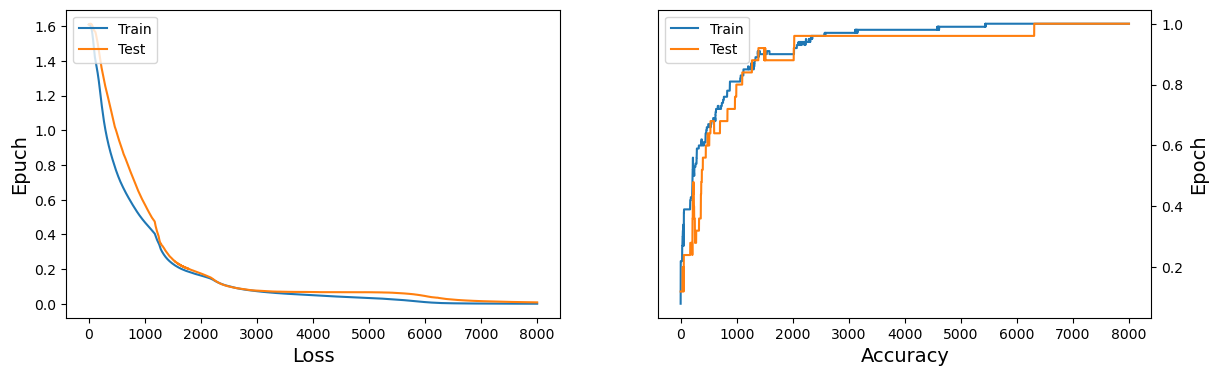

In [11]:
f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_xlabel('Loss', fontsize=14)
axes[0].set_ylabel('Epuch', fontsize=14)
axes[0].yaxis.tick_left()
axes[0].legend(['Train', 'Test'], loc='upper left')

axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_xlabel('Accuracy', fontsize=14)
axes[1].set_ylabel('Epoch', fontsize=14)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

In [12]:
y_pred = classifier.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

#calculate the accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='macro')
recall = recall_score(y_test_labels, y_pred_labels, average='macro')

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

1/1 [==============================] - 0s 44ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
